In [14]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.getcwd()

'C:\\Users\\fuku_k\\Documents\\pypro\\vleague_stats'

In [26]:
division = 'v1_m'
path = 'database/{0}/teamdb_2020-21_regular.csv'.format(division)
df = pd.read_csv(path)
df

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpBP/S,OpSVA,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%
0,128,59,8,46.1,14.75,34,24,1,70.6,10,...,2.25,96,6,21,18,5.5,86,43.0,24.0,64.0
1,139,54,9,38.8,13.50,28,10,6,35.7,9,...,2.50,106,7,17,15,6.1,73,32.0,19.0,56.8
2,123,55,10,44.7,13.75,31,10,6,32.3,10,...,1.50,89,1,17,12,-0.3,81,27.0,20.0,45.7
3,135,53,11,39.3,13.25,35,17,5,48.6,6,...,2.50,98,4,15,31,8.2,72,28.0,31.0,60.4
4,121,61,7,50.4,15.25,37,19,4,51.4,13,...,2.50,91,7,6,25,12.9,78,35.0,24.0,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,102,52,1,51.0,13.00,31,15,1,48.4,3,...,3.00,95,3,13,24,6.1,68,39.0,13.0,66.9
346,89,36,9,40.4,12.00,24,12,3,50.0,4,...,3.33,74,4,10,24,10.1,50,23.0,11.0,57.0
347,79,42,4,53.2,14.00,10,6,1,60.0,10,...,1.33,56,1,6,15,5.8,62,25.0,11.0,49.2
348,66,40,2,60.6,13.33,12,8,0,66.7,8,...,1.00,60,3,18,8,0.8,60,16.0,24.0,46.7


In [4]:
division = 'v1_m'
tree = glob.glob('database/{}/*'.format(division))
print(tree)

['database/v1_m\\playerdb_2017-18_regular.csv', 'database/v1_m\\playerdb_2018-19_regular.csv', 'database/v1_m\\playerdb_2019-20_regular.csv', 'database/v1_m\\playerdb_2020-21_regular.csv', 'database/v1_m\\playerdb_2021-22_regular.csv', 'database/v1_m\\teamdb_2017-18_regular.csv', 'database/v1_m\\teamdb_2018-19_regular.csv', 'database/v1_m\\teamdb_2019-20_regular.csv', 'database/v1_m\\teamdb_2020-21_regular.csv', 'database/v1_m\\teamdb_2021-22_regular.csv']


In [18]:
# df.iloc[:, 30:]
f = lambda x: 1 if x == 'Win' else 0
df['Win'] = df['Win_Lose'].map(f)
df['Win']

0      1
1      0
2      1
3      0
4      1
      ..
345    0
346    0
347    1
348    1
349    0
Name: Win, Length: 350, dtype: int64

In [6]:
df.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%', 'MatchNo.', 'Date', 'Year', 'Month', 'Day', 'Place', 'Venue',
       'Team', 'Op.Team', 'Director', 'Coach', 'Win_Set', 'Lose_Set',
       'Total_Set', 'Win_Lose', 'Get_Point', 'Lose_Point', 'Game_Time',
       'Start_Time', 'End_Time', 'Spectators', 'Jury', 'Chief_Umpire',
       'Sub_Umpire', 'Judgeman', 'Home_Away', 'OpAA', 'OpAP', 'OpAE',
       'OpASucc%', 'OpAP/S', 'OpBAA', 'OpBAP', 'OpBAE', 'OpBASucc%', 'OpBP',
       'OpBP/S', 'OpSVA', 'OpSVP', 'OpSVE', 'OpSVx', 'OpSVEff%', 'OpRA',
       'OpRx', 'OpRg', 'OpRSucc%', 'Win'],
      dtype='object')

In [17]:
df2 = df[['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%']]
# df2['BASucc%'] = df2['BASucc%'].replace('-', 0).astype(float)
df2['BASucc%'].replace('-', 0, inplace=True) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AA       350 non-null    int64  
 1   AP       350 non-null    int64  
 2   AE       350 non-null    int64  
 3   ASucc%   350 non-null    float64
 4   AP/S     350 non-null    float64
 5   BAA      350 non-null    int64  
 6   BAP      350 non-null    int64  
 7   BAE      350 non-null    int64  
 8   BASucc%  350 non-null    float64
 9   BP       350 non-null    int64  
 10  BP/S     350 non-null    float64
 11  SVA      350 non-null    int64  
 12  SVP      350 non-null    int64  
 13  SVE      350 non-null    int64  
 14  SVx      350 non-null    int64  
 15  SVEff%   350 non-null    float64
 16  RA       350 non-null    int64  
 17  Rx       350 non-null    float64
 18  Rg       350 non-null    float64
 19  RSucc%   350 non-null    float64
dtypes: float64(8), int64(12)
memory usage: 54.8 KB


In [10]:
df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df3

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,BP/S,SVA,SVP,SVE,SVx,SVEff%,RA,Rx,Rg,RSucc%
0,1.064763,0.693623,0.509180,-0.514083,0.647427,1.550162,2.875603,-0.753833,1.494255,0.738532,0.633823,1.229896,1.493348,0.681903,-0.805834,-0.037409,0.242447,0.238374,0.183633,0.106205
1,1.542987,0.254938,0.846705,-1.513383,-0.032480,0.765743,-0.297208,2.164767,-1.256619,0.456342,0.349590,0.652635,1.047763,1.550569,-0.379360,-0.206356,1.110372,1.457153,0.969347,1.014066
2,0.847388,0.342675,1.184230,-0.705729,0.103501,1.157952,-0.297208,2.164767,-1.524613,0.738532,0.633823,0.768087,0.156592,0.247570,1.468698,0.553902,0.175683,-0.204818,2.069347,0.560136
3,1.369087,0.167201,1.521754,-1.444938,-0.168462,1.680898,1.289198,1.581047,-0.239820,-0.390229,-0.503108,0.248552,-1.180165,0.681903,-1.232309,-1.839501,0.776555,-0.315616,0.340776,-1.293414
4,0.760438,0.869096,0.171655,0.074547,0.919390,1.942372,1.742456,0.997327,-0.019120,1.585103,1.486521,0.248552,0.602177,-1.272595,-0.237201,0.694690,0.910081,0.903162,0.340776,0.232297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.065585,0.079465,-1.853493,0.156681,-0.304443,1.157952,0.835939,-0.753833,-0.255585,-1.236799,-1.355807,-0.040078,0.156592,0.030403,-0.947993,-0.403459,0.643028,0.681566,0.026490,0.131424
346,-0.630759,-1.324325,0.846705,-1.294359,-0.848369,0.242796,0.156051,0.413607,-0.129470,-0.954609,-0.696387,-1.656410,-1.180165,-1.706928,-0.805834,-0.121883,-0.491951,-0.537212,-1.073510,-0.852092
347,-1.065508,-0.797904,-0.840919,0.457840,0.239483,-1.587515,-1.203726,-0.753833,0.658746,0.738532,1.577476,-0.617340,0.156592,-0.838263,0.473590,1.088898,-1.293113,-0.758808,-1.073510,0.131424
348,-1.630682,-0.973378,-1.515968,1.470830,-0.124948,-1.326042,-0.750467,-1.337553,1.186851,0.174152,0.827101,-0.675066,-0.734580,-0.186763,-0.095043,-0.318986,-1.960748,-1.534395,-0.287796,0.509699


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AA       350 non-null    float64
 1   AP       350 non-null    float64
 2   AE       350 non-null    float64
 3   ASucc%   350 non-null    float64
 4   AP/S     350 non-null    float64
 5   BAA      350 non-null    float64
 6   BAP      350 non-null    float64
 7   BAE      350 non-null    float64
 8   BASucc%  350 non-null    float64
 9   BP       350 non-null    float64
 10  BP/S     350 non-null    float64
 11  SVA      350 non-null    float64
 12  SVP      350 non-null    float64
 13  SVE      350 non-null    float64
 14  SVx      350 non-null    float64
 15  SVEff%   350 non-null    float64
 16  RA       350 non-null    float64
 17  Rx       350 non-null    float64
 18  Rg       350 non-null    float64
 19  RSucc%   350 non-null    float64
dtypes: float64(20)
memory usage: 54.8 KB


In [12]:
X = df3 # 説明変数
Y = df['Win']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

In [13]:
lr.coef_[0]

array([ 0.70976066,  1.31172016,  0.37148212,  1.10433595,  0.16319819,
        0.21649945,  0.26238045, -0.70295446,  0.09906001,  0.55762613,
        0.76508153,  1.27494063,  0.50932558, -0.08344273,  0.28922974,
        0.1326849 , -2.60095996, -1.42163844, -0.34231767,  1.14155214])

In [85]:
df3.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%'],
      dtype='object')

In [90]:
Y_pred = lr.predict(X_test)
print(Y_pred)
print(Y_test)
count = 0
for i,j in zip(Y_pred, Y_test):
    if i == j:
        count += 1
print(count/len(Y_pred))

[1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0]
76     1
269    1
327    0
158    0
200    1
      ..
134    1
65     0
103    1
66     1
275    0
Name: Win, Length: 68, dtype: int64
0.9411764705882353


In [28]:
# df4 = pd.DataFrame(list(zip(df3.columns, lr.coef_[0])), columns=['stats', 'coef_'])
# df4 = pd.DataFrame(lr.coef_[0], index=df3.columns, columns=[division])
df4 = pd.DataFrame(index=df3.columns)
df4

""
AA
AP
AE
ASucc%
AP/S
BAA
BAP
BAE
BASucc%
BP


In [ ]:
df4 = pd.DataFrame(list(zip(df3.columns, lr.coef_[0])), columns=['stats', 'coef_'])
df4

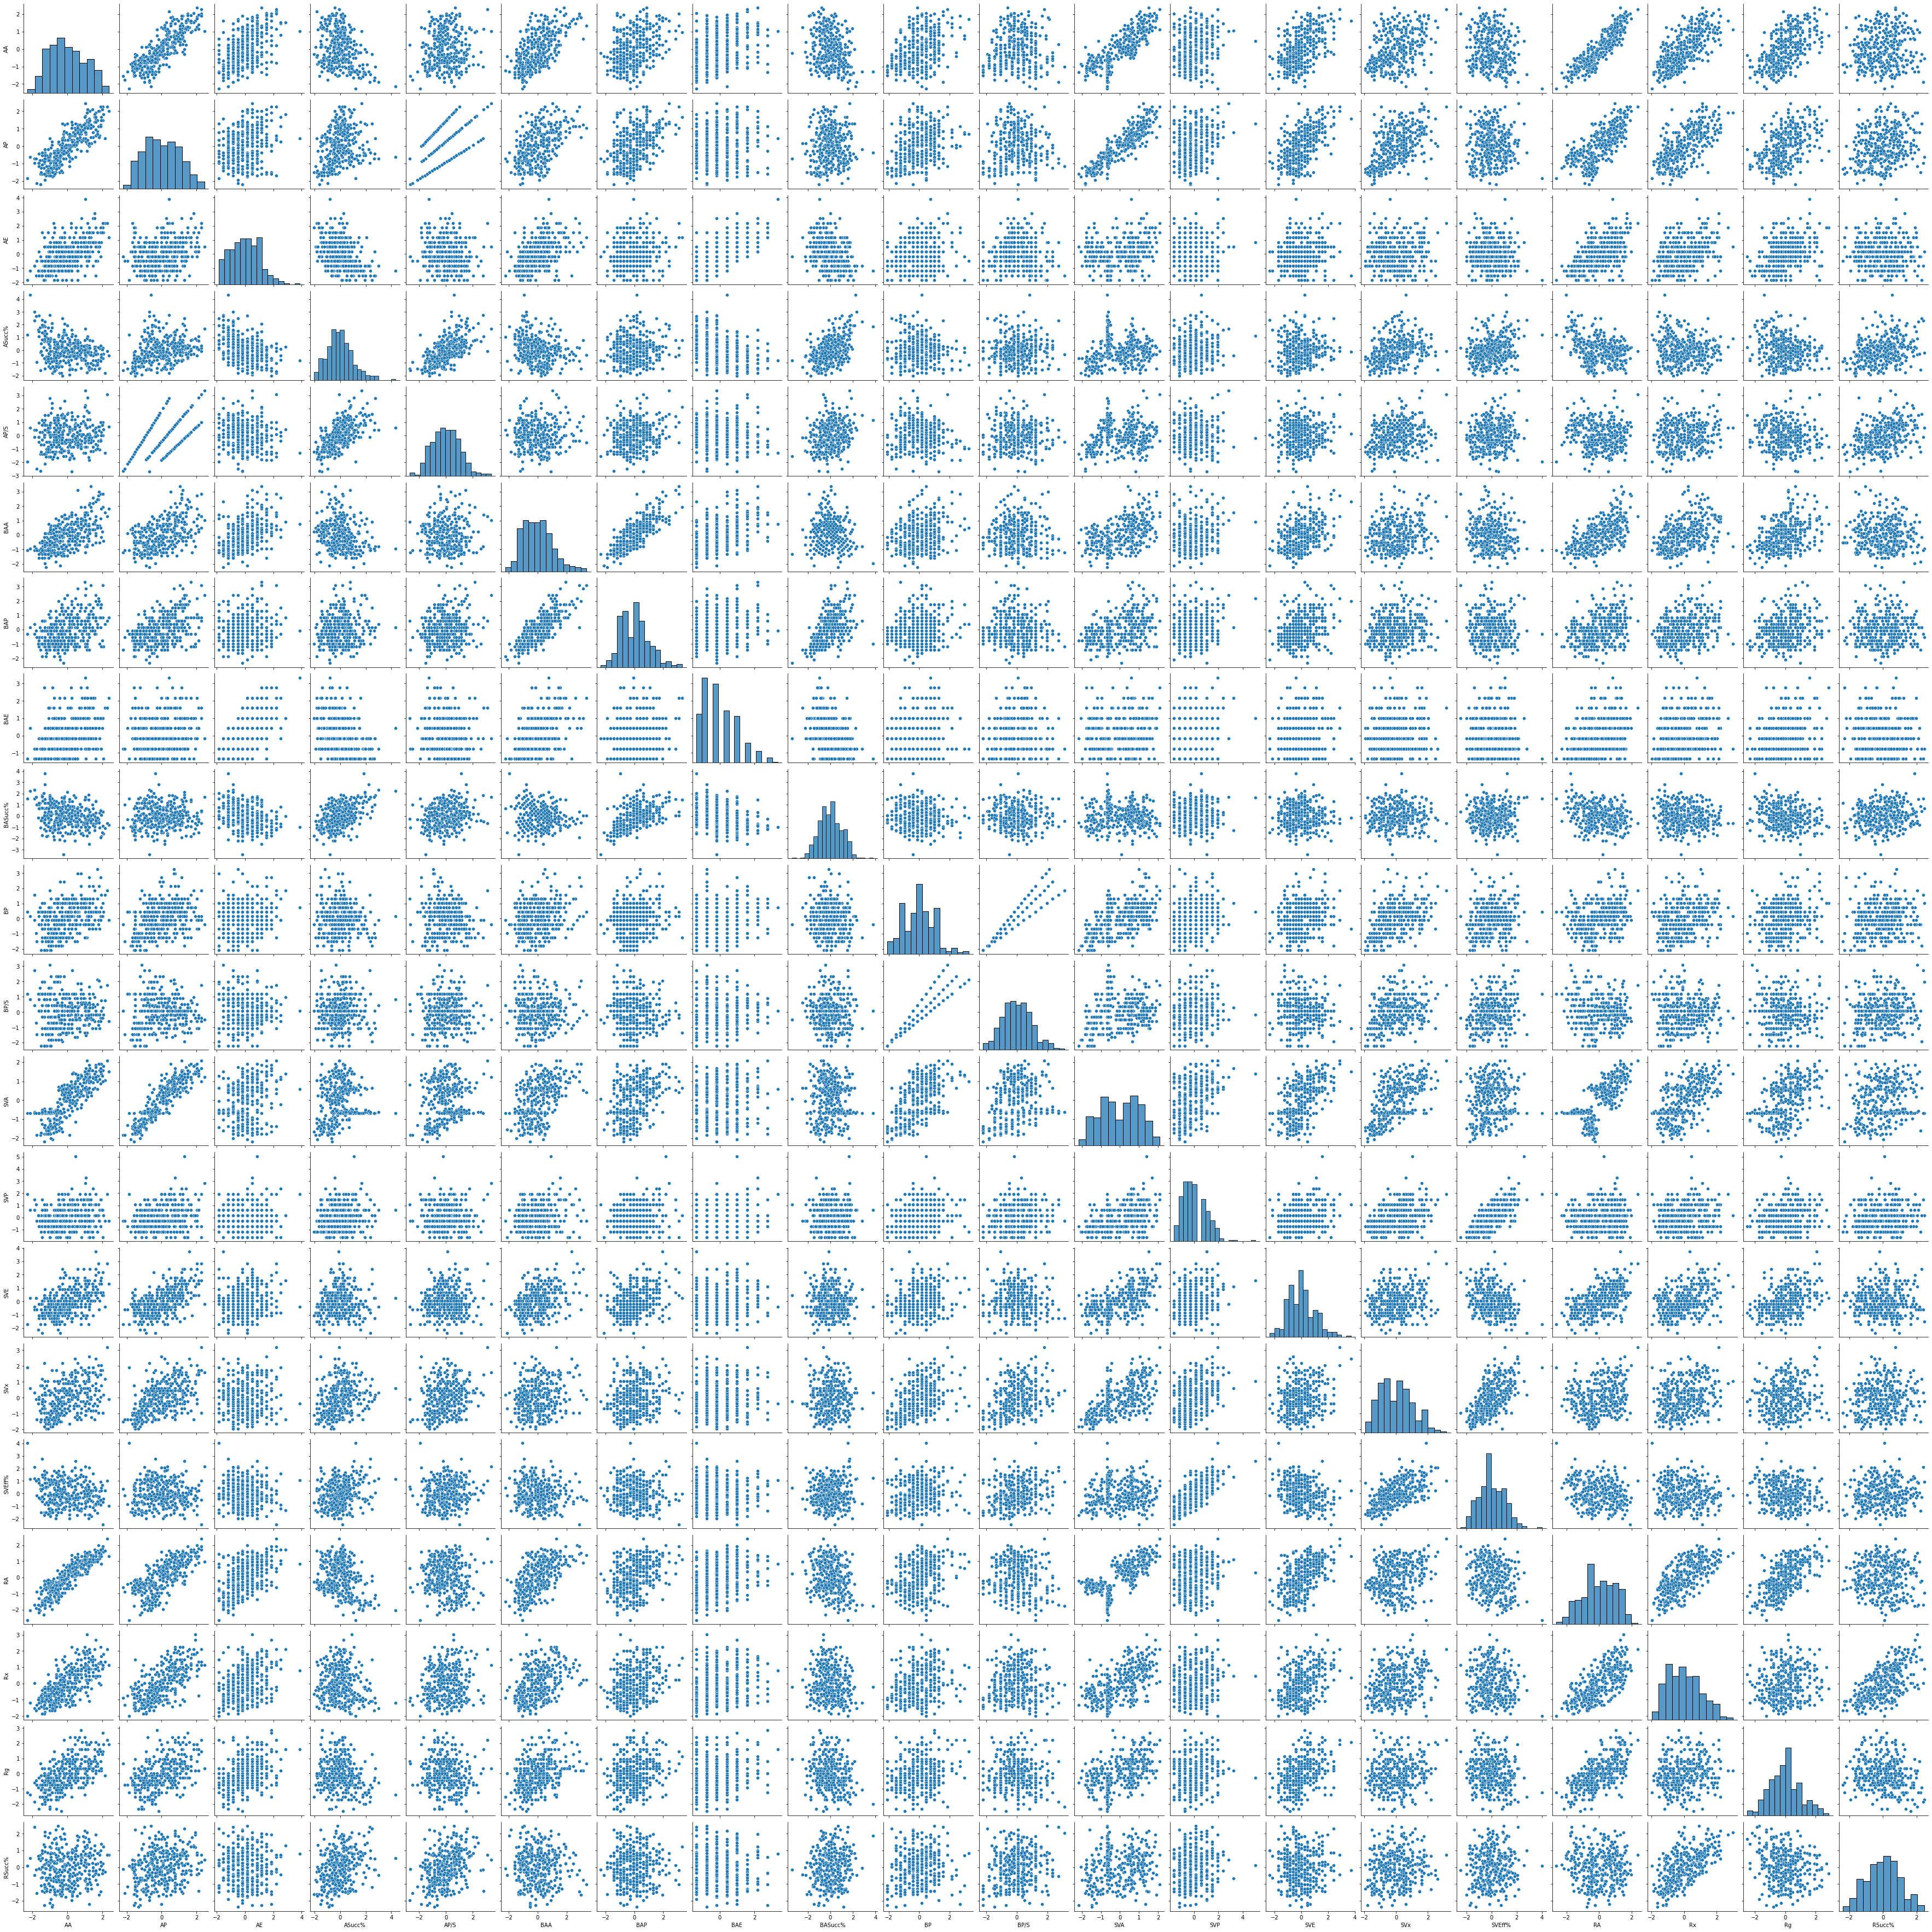

In [19]:
sns.pairplot(df3)

In [21]:
df3.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%'],
      dtype='object')